Data from here: https://www.kaggle.com/datasets/manishshah120/facial-expression-recog-image-ver-of-fercdataset

In [ ]:
#imports
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

In [117]:
anger_train_name = os.listdir('Dataset\\train\\anger')
disgust_train_name = os.listdir('Dataset\\train\\disgust')
fear_train_name = os.listdir('Dataset\\train\\fear')
happiness_train_name = os.listdir('Dataset\\train\\happiness')
neutral_train_name = os.listdir('Dataset\\train\\neutral')
sadness_train_name = os.listdir('Dataset\\train\\sadness')
surprise_train_name = os.listdir('Dataset\\train\\surprise') 


anger_test_name = os.listdir('Dataset\\test\\anger')
disgust_test_name = os.listdir('Dataset\\test\\disgust')
fear_test_name = os.listdir('Dataset\\test\\fear')
happiness_test_name = os.listdir('Dataset\\test\\happiness')
neutral_test_name = os.listdir('Dataset\\test\\neutral')
sadness_test_name = os.listdir('Dataset\\test\\sadness')
surprise_test_name = os.listdir('Dataset\\test\\surprise')

In [118]:
train = {
    "anger":anger_train_name,
    "disgust":disgust_train_name,
    "fear":fear_train_name,
    "happiness":happiness_train_name,
    "neutral":neutral_train_name,
    "sadness":sadness_train_name,
    "surprise":surprise_train_name
}

In [119]:
test = {
    "anger":anger_test_name,
    "disgust":disgust_test_name,
    "fear":fear_test_name,
    "happiness":happiness_test_name,
    "neutral":neutral_test_name,
    "sadness":sadness_test_name,
    "surprise":surprise_test_name
}

In [120]:
names = {
    'train' : train,
    'test' : test
}

In [137]:
tp = ('train', 'test')
emo = ('anger','disgust','fear','happiness','neutral','sadness','surprise')

In [136]:
len(names)

2

## what I want to do:
1. convert images to arrays  
    i) loop through test and train data  
    ii) loop through emotions  
    iii) convert indevidual images to arrays, append to master image array  
    iiii) append image type to category array
2. attach second array with categorizations

In [173]:
filenames = []
for i in range(len(names)):
    
    for j in range(len(emo)):
        for val in names[tp[i]][emo[j]]:
            filenames.append(val)

In [162]:
len(filenames) == len(np.unique(filenames)) 
#these are the filenames for ALL images, both training and testing. no repeats either!

True

In [214]:
from PIL import Image
import os,os.path
import time
t0 = time.time()
train_imgs = []
train_cats = []

i=0 #making just the training data
for j in range(len(emo)):
    path="Dataset\\{}\\{}".format(tp[i],emo[j])
    print(path)
    valid_images=['.png']

    for f in os.listdir(path):
        print(f)
        ext = os.path.splitext(f)[1]
        if ext.lower() not in valid_images:
            continue
        train_imgs.append(np.asarray(Image.open(os.path.join(path,f))))
        train_cats.append(j)
t1 = time.time()

dt1 = t1-t0

print('runtime_train = {}'.format(dt1))

Dataset\train\anger
10005903.png
10047185.png
10069404.png
1007604.png
10115624.png
10116440.png
10172637.png
10173409.png
10234726.png
10250223.png
10252807.png
10287757.png
10293068.png
10293730.png
10304400.png
10306185.png
10325285.png
1033587.png
10340394.png
10351048.png
10381865.png
10445590.png
10447149.png
10476648.png
1047828.png
10491220.png
10494088.png
10521248.png
10521840.png
10526505.png
10528336.png
10536969.png
10543477.png
10560559.png
10562960.png
10563294.png
10628692.png
10690824.png
10701204.png
10735860.png
10749877.png
10815015.png
1081797.png
1082738.png
10829492.png
10838392.png
10840122.png
10851133.png
10853306.png
10869373.png
10869395.png
10877108.png
10898465.png
10905489.png
10906144.png
10912809.png
10936989.png
10968269.png
10974032.png
10975093.png
1097688.png
10983010.png
10994535.png
11041504.png
11050990.png
11052128.png
11061692.png
11135119.png
11159135.png
11183267.png
11189604.png
11214287.png
11214547.png
11239717.png
11246416.png
11252556.pn

23428254.png
23440071.png
23444551.png
23480754.png
23488248.png
23499821.png
23508547.png
23517343.png
23625363.png
23630201.png
23657759.png
23666345.png
23677379.png
2368250.png
23684359.png
23738019.png
23741147.png
23746360.png
23747377.png
23758122.png
23765097.png
23766364.png
23794110.png
23797656.png
23833885.png
23955494.png
24032612.png
24039711.png
24064506.png
24065299.png
24087425.png
24107753.png
24128670.png
24129330.png
24134963.png
24173069.png
24181802.png
24189271.png
24206514.png
24230974.png
24237022.png
24242694.png
24268924.png
24327605.png
24348523.png
24364851.png
24365508.png
24384521.png
24389689.png
24434511.png
24471377.png
24481507.png
24519559.png
24523860.png
24524295.png
24531775.png
24537633.png
24586045.png
24590076.png
24597717.png
24608016.png
24634000.png
24650019.png
24656881.png
24670315.png
24687014.png
24692833.png
24731554.png
2473323.png
24778766.png
24786127.png
24843631.png
24873817.png
24904476.png
24906656.png
2490925.png
24948127.png
24

36258294.png
36273408.png
36306806.png
36350798.png
36387149.png
36392020.png
36393532.png
36441136.png
36441683.png
3649538.png
36526414.png
36528993.png
36618736.png
36635283.png
36638488.png
36645857.png
3664665.png
36677329.png
36690416.png
36710395.png
36725051.png
36725424.png
36744074.png
36747304.png
36748319.png
36803803.png
36805042.png
36830506.png
36835441.png
36851748.png
36861177.png
3688721.png
36891885.png
36912658.png
36919553.png
36931190.png
36972205.png
36987574.png
37040809.png
37071696.png
37072452.png
37074925.png
37086279.png
37114820.png
3713853.png
37178372.png
37203480.png
37228237.png
372767.png
37312131.png
3731493.png
37328085.png
37367152.png
3738483.png
373971.png
37411551.png
37417023.png
37431252.png
37451528.png
37465191.png
374764.png
37515011.png
37536857.png
37546744.png
37568858.png
37571889.png
37605647.png
37609583.png
37613580.png
37616312.png
37640143.png
37645625.png
37656286.png
37698520.png
37723171.png
37725944.png
37727639.png
3773636.png

49309249.png
49336643.png
49350592.png
4936875.png
49379241.png
49397403.png
49405193.png
49408301.png
49422628.png
49428551.png
4943299.png
4944352.png
49454568.png
49495920.png
49517467.png
4953350.png
49539232.png
49542430.png
4955320.png
4961412.png
49624454.png
49666840.png
49670437.png
49679202.png
49693684.png
49761683.png
49764166.png
49777416.png
49792404.png
49792649.png
49829404.png
49836145.png
49849732.png
49856053.png
49883649.png
49884777.png
49921101.png
49924487.png
49940226.png
49941792.png
49955615.png
49969886.png
50010752.png
50119975.png
50150388.png
50178990.png
50200895.png
5021392.png
50219169.png
50222948.png
50244281.png
50267074.png
50296877.png
50346372.png
50347230.png
50360468.png
50364129.png
50397788.png
5041651.png
50422964.png
50453983.png
50484957.png
50487557.png
50493279.png
50557095.png
50558471.png
50566938.png
50576537.png
5059647.png
50682810.png
50694935.png
50702175.png
50704784.png
50711078.png
5072097.png
50740419.png
50748465.png
50764674.

61856727.png
61860134.png
61864397.png
61935125.png
61939938.png
61941624.png
61956547.png
61976124.png
61988433.png
62000040.png
62003125.png
62067490.png
62087145.png
62115122.png
62123355.png
62128037.png
62130815.png
62138558.png
62141281.png
62145833.png
62156405.png
6217352.png
62182696.png
62209283.png
62216592.png
62242424.png
62252442.png
62315058.png
62367149.png
62371094.png
62373758.png
62385479.png
62433053.png
6245802.png
62458953.png
62464743.png
62492855.png
62504955.png
62524990.png
62551028.png
62605649.png
62608555.png
62666896.png
62693793.png
62694527.png
62697867.png
62733399.png
62743564.png
62751745.png
62782096.png
62787734.png
62861906.png
62877051.png
62877307.png
62887182.png
62891652.png
62896712.png
62905066.png
62908915.png
62911743.png
62956393.png
62956545.png
63004690.png
63010042.png
63103106.png
63143268.png
63146037.png
63188508.png
63193023.png
6323914.png
63244782.png
63245505.png
63265722.png
63266895.png
63297684.png
63304594.png
63377401.png
63

74647263.png
74667513.png
74671918.png
74673575.png
74689613.png
74720711.png
7472555.png
74748842.png
747496.png
74778469.png
74796066.png
74803088.png
74816470.png
74819665.png
74824547.png
74826144.png
74848517.png
74880483.png
74907478.png
74914229.png
7494035.png
74965885.png
74965966.png
74978349.png
74978689.png
74982036.png
74994513.png
7499662.png
75005083.png
75015330.png
75035374.png
75084053.png
75134503.png
7513710.png
75161058.png
75165870.png
7517484.png
75231053.png
75258663.png
75278626.png
75392477.png
75405153.png
75405780.png
75520296.png
75520736.png
75522351.png
75547209.png
75580743.png
75647343.png
75679437.png
75701571.png
75749960.png
75755539.png
75825017.png
75859025.png
75885136.png
7589006.png
75906186.png
7591217.png
75938404.png
75941507.png
75947267.png
75959715.png
7597225.png
75989445.png
75993589.png
76028653.png
76030153.png
76071154.png
76090792.png
76090853.png
76100240.png
76104172.png
76126959.png
7612831.png
76131596.png
76197882.png
76224517.p

87943319.png
87989680.png
87990277.png
88032975.png
88034781.png
8803959.png
88044325.png
88052599.png
88069044.png
88100291.png
8810688.png
88142093.png
88208297.png
88230276.png
88231574.png
88238329.png
88241801.png
88243940.png
88246254.png
88269731.png
8830360.png
88306433.png
88395900.png
88454574.png
8846568.png
88485127.png
88494868.png
88513077.png
88553391.png
88566078.png
88574537.png
88576528.png
88623642.png
88642934.png
88663144.png
88679773.png
88719631.png
88721680.png
88735677.png
88739318.png
8874108.png
88790789.png
88792686.png
88797916.png
8880116.png
88842512.png
88861021.png
88880871.png
8890936.png
88915156.png
88934617.png
88947454.png
88990999.png
8899775.png
88998837.png
89011736.png
8902223.png
89045358.png
89052361.png
89061451.png
89087367.png
89100676.png
89112894.png
89119699.png
89134999.png
89152338.png
89166658.png
89222575.png
89232057.png
89258936.png
89267452.png
89271048.png
89326626.png
89365314.png
8937953.png
89383137.png
89385215.png
893909.pn

2515062.png
2523978.png
2550232.png
2550692.png
2555742.png
2594914.png
2606441.png
261258.png
2619173.png
2632090.png
2665070.png
2691430.png
2700606.png
2737551.png
2754987.png
2767568.png
2768968.png
2770192.png
2777791.png
2803297.png
2810772.png
2849817.png
2882171.png
2882420.png
2884821.png
2907959.png
2931124.png
2937701.png
2950073.png
2957765.png
2962172.png
2962351.png
298083.png
3004370.png
3004509.png
3018229.png
301827.png
3032084.png
3042423.png
3048005.png
3050250.png
3092488.png
3109890.png
3115363.png
3121335.png
3130644.png
3134269.png
3193424.png
3228904.png
3233796.png
3246685.png
3268805.png
3319049.png
3345767.png
3366642.png
3389515.png
3429373.png
3430933.png
3443084.png
3482736.png
3488401.png
3490645.png
3494820.png
3517883.png
3536629.png
3550993.png
3585513.png
3658453.png
3659067.png
366283.png
3691754.png
3744124.png
3767453.png
3784542.png
3785967.png
3787351.png
3831951.png
389081.png
3901475.png
3903643.png
3944536.png
395165.png
3985857.png
4023744.pn

147315765.png
147621335.png
14808530.png
148128550.png
148147559.png
148395201.png
149164925.png
1492743.png
149385837.png
149485778.png
149722895.png
14974071.png
150193074.png
150313430.png
15075337.png
150879854.png
151258561.png
15139692.png
151451016.png
151463719.png
151832382.png
152198190.png
152312903.png
152553157.png
152686108.png
152789469.png
152869637.png
153450759.png
153468081.png
153503664.png
153585601.png
153646260.png
153733676.png
153834560.png
153898459.png
153917834.png
154018192.png
15451896.png
154564312.png
154650033.png
155095685.png
155107649.png
155737346.png
155760767.png
155861454.png
156137246.png
156408342.png
156470086.png
156480388.png
156547901.png
156824782.png
157218648.png
157372032.png
157423971.png
157517408.png
157668533.png
157773230.png
158019860.png
158379946.png
158420686.png
158466477.png
158836690.png
158836834.png
158839278.png
158896028.png
159058371.png
159086553.png
159209590.png
159580312.png
159843745.png
160081961.png
160117893.png

265740271.png
265772602.png
266130208.png
266177857.png
266337392.png
266439709.png
266898283.png
266983655.png
267147943.png
267325437.png
267366624.png
267505150.png
267535610.png
267914081.png
268143833.png
268185221.png
268266831.png
26830843.png
268346967.png
2684293.png
268449098.png
268589811.png
268645375.png
268834104.png
268868960.png
26889232.png
268971473.png
268994307.png
269181538.png
269501076.png
269775368.png
269966511.png
269978196.png
270108.png
270173668.png
270451143.png
270494565.png
270587805.png
270603457.png
270610971.png
270829966.png
270925161.png
270949295.png
271024941.png
27110238.png
271778365.png
272286892.png
272345334.png
272384411.png
273297460.png
273406174.png
273645577.png
273718419.png
273763570.png
273780007.png
274153216.png
274324349.png
274589001.png
274641353.png
274729159.png
274776860.png
275004193.png
275146864.png
275489834.png
275861519.png
276122446.png
276594153.png
276941348.png
27727456.png
27768220.png
277834388.png
277936936.png
27

37535612.png
375370938.png
375755879.png
376236618.png
376346324.png
37648261.png
376562354.png
376665035.png
376954118.png
376972885.png
376977751.png
377323812.png
377673009.png
377818242.png
378261194.png
378741727.png
378851377.png
37919341.png
379221231.png
37937392.png
379483804.png
379948950.png
380069591.png
38011969.png
380190507.png
380703275.png
380729997.png
381060038.png
381149451.png
381175540.png
381283084.png
381499332.png
381701683.png
381863550.png
382054755.png
382847798.png
383066897.png
383449813.png
383800599.png
383893749.png
384221709.png
384499297.png
384536362.png
384587467.png
384653176.png
384765898.png
384803134.png
384823155.png
384852470.png
385669065.png
3859024.png
386284065.png
386597768.png
387112438.png
387173155.png
387253377.png
387446799.png
387712297.png
388005256.png
388170003.png
388266741.png
38834735.png
388504732.png
388914202.png
38897501.png
389081610.png
389226259.png
389430211.png
389752045.png
389997883.png
390572162.png
390631759.png
3

500058901.png
500142204.png
50014483.png
500596328.png
500684724.png
500846632.png
501017145.png
501063306.png
501244562.png
501487354.png
501972710.png
502017641.png
502101628.png
50238169.png
502409072.png
502523825.png
502617674.png
502782172.png
502846281.png
502962974.png
503122377.png
5032295.png
503458561.png
503758158.png
504028015.png
504165358.png
504188892.png
504479525.png
504775051.png
505036196.png
505089623.png
505119814.png
505132656.png
505557914.png
505824790.png
506266572.png
506429535.png
50653392.png
506717120.png
506831051.png
506885828.png
507138020.png
507647460.png
507725902.png
507728384.png
507742292.png
507768679.png
508112381.png
508380806.png
508486091.png
508626601.png
509138341.png
509139119.png
509195398.png
509234768.png
50932247.png
509452263.png
509500827.png
509592998.png
510366960.png
51049540.png
510972284.png
511019706.png
511406581.png
511703971.png
511819093.png
512232524.png
512547782.png
512676275.png
512911675.png
512914526.png
512956972.png

617196372.png
617226826.png
617322457.png
617399107.png
617500894.png
617644175.png
617726265.png
618024772.png
618237697.png
619045672.png
619050716.png
619055039.png
619067251.png
619335951.png
619587697.png
619827682.png
619920265.png
619947845.png
620040154.png
620084140.png
620086558.png
620475779.png
620488117.png
620783665.png
620784775.png
621016410.png
62107447.png
621082776.png
621483426.png
621582736.png
621739547.png
621875414.png
621917226.png
622480166.png
622821299.png
622842161.png
623132751.png
623154462.png
623203618.png
623363785.png
623655815.png
623729209.png
623794068.png
62389388.png
624031592.png
624213559.png
62433617.png
624667410.png
625029692.png
625041481.png
625205762.png
62653986.png
62665570.png
626850978.png
62728967.png
627841986.png
627953287.png
6282570.png
628473813.png
628577598.png
628895450.png
629050911.png
629191451.png
629210065.png
629415091.png
629622557.png
629972404.png
630043696.png
630103998.png
630116846.png
630328395.png
630722600.png


737142248.png
737727542.png
738155386.png
738204520.png
738397798.png
73909436.png
739108202.png
739126654.png
739332545.png
739483613.png
739678071.png
739831439.png
739891559.png
73990986.png
740019071.png
740056577.png
740453426.png
740499759.png
740517738.png
740598258.png
740643780.png
740890905.png
741016265.png
741546867.png
741896137.png
741981554.png
742494114.png
742985966.png
743400263.png
743609084.png
743612008.png
743676737.png
743830747.png
744179531.png
744432506.png
744516388.png
744517943.png
744660895.png
744922142.png
745102091.png
745370277.png
745379684.png
745660458.png
745932352.png
746123535.png
746671886.png
746986608.png
74707202.png
747078943.png
747207164.png
747282900.png
747335653.png
747564492.png
74774721.png
747801031.png
747988938.png
748450820.png
748536638.png
749275943.png
7501696.png
750230902.png
750231260.png
750272057.png
750289412.png
750319221.png
750572174.png
750676440.png
750810980.png
75091396.png
751402173.png
751430552.png
751745213.png

850822496.png
850942403.png
851553529.png
852008694.png
852143234.png
852268093.png
852400351.png
852430363.png
852445932.png
852706472.png
852820992.png
853073807.png
853487424.png
853721401.png
854331858.png
854472152.png
854537755.png
854932148.png
855131477.png
855207826.png
855488090.png
85551610.png
855601953.png
855687387.png
855851323.png
855866070.png
856230165.png
856333229.png
856666674.png
857224249.png
857242705.png
857481379.png
857792195.png
857918607.png
858041167.png
858074483.png
858224871.png
858323389.png
858613096.png
858842187.png
859323471.png
859345973.png
859866465.png
860022382.png
860305867.png
860319587.png
860550014.png
860595815.png
860604548.png
860609643.png
860936520.png
861030602.png
861102878.png
861193666.png
861488759.png
861577120.png
861672885.png
861835339.png
861864825.png
862536691.png
862537896.png
863124632.png
863401741.png
863449979.png
863524178.png
86376886.png
86393393.png
864025242.png
864424287.png
86467707.png
864804447.png
864962815.

969447468.png
969750120.png
969986587.png
970134216.png
970279176.png
970293756.png
970498995.png
971257371.png
971515999.png
971858481.png
971994003.png
972095682.png
972535657.png
972623428.png
972922212.png
973262842.png
97337305.png
973500536.png
973730242.png
973822858.png
97391687.png
974024135.png
974324388.png
974572534.png
974717730.png
975368314.png
975507332.png
975511759.png
975718573.png
97572499.png
976085829.png
97674924.png
9770422.png
977125536.png
977264973.png
977614884.png
977690062.png
977986197.png
97825663.png
978449857.png
97865017.png
979255641.png
979884449.png
979913244.png
980049020.png
98015852.png
980327157.png
980352999.png
980443398.png
980470557.png
980600637.png
980712688.png
980915627.png
981912361.png
982395335.png
982522115.png
982687853.png
982947687.png
983126076.png
983517941.png
983710643.png
984165578.png
984451146.png
984694433.png
984983067.png
985000577.png
985248491.png
985347599.png
985504418.png
985837364.png
985868775.png
986082675.png
9

148553267.png
148729757.png
148739010.png
149002942.png
149335734.png
149583168.png
149721048.png
149795406.png
149976565.png
150029459.png
150534259.png
150555744.png
150703734.png
151010562.png
151196144.png
151242656.png
151265633.png
151480002.png
15157171.png
15158154.png
151870420.png
151878392.png
152046450.png
152137128.png
152168555.png
152530007.png
152566415.png
152726073.png
152797293.png
152894404.png
152902094.png
152902330.png
152973885.png
153046970.png
153098748.png
153117235.png
153244222.png
154066363.png
154145393.png
15418465.png
154194006.png
154348922.png
154349141.png
15436516.png
154397858.png
154573714.png
154608064.png
154632980.png
154751354.png
154775966.png
154864932.png
1549110.png
154922833.png
155048070.png
15509355.png
155602239.png
155637732.png
155805659.png
15602639.png
156031768.png
156245135.png
156263756.png
156340173.png
156425601.png
156480330.png
156744839.png
156758357.png
156785836.png
156903480.png
156938703.png
157073404.png
15709760.png
1

211408394.png
211529435.png
21155214.png
211688461.png
211831110.png
212002726.png
212120717.png
212136662.png
212253979.png
212315810.png
212366894.png
21252291.png
212682758.png
212798504.png
212873814.png
212920548.png
213064959.png
213090185.png
213225585.png
213316068.png
213478981.png
213704459.png
213908702.png
213917866.png
214047198.png
214048074.png
214082708.png
214240560.png
214365686.png
2144112.png
214753882.png
214878491.png
215138524.png
215146627.png
215419312.png
215792745.png
215874847.png
21599185.png
216168839.png
216174797.png
216268187.png
216806802.png
216979915.png
217122848.png
217187287.png
217719526.png
217761347.png
21780211.png
217991276.png
218114383.png
218159523.png
218213480.png
218264943.png
218266402.png
218345391.png
218440272.png
218538935.png
218658066.png
218790853.png
218890772.png
218993855.png
219011531.png
2191073.png
219162296.png
219300852.png
219386913.png
219413329.png
219666148.png
2197333.png
219770263.png
219776336.png
219801481.png
21

276694899.png
276759251.png
276780376.png
276836275.png
276981660.png
277092098.png
277115236.png
2771307.png
27715560.png
277554648.png
277606274.png
277818999.png
277848346.png
278229122.png
278261151.png
278312537.png
278416632.png
278440639.png
27849793.png
278541044.png
278547994.png
278700034.png
278755686.png
278861927.png
279127433.png
279394319.png
279432705.png
279704412.png
280253987.png
280264575.png
280348257.png
28035151.png
280479696.png
280489458.png
280690037.png
280728625.png
28074004.png
280848904.png
280900128.png
280926227.png
280940054.png
281050906.png
281468758.png
281584211.png
281588381.png
28158862.png
281663325.png
281689454.png
281696472.png
281915530.png
281950087.png
282095849.png
28220847.png
282318860.png
282367823.png
282370033.png
282407092.png
282542634.png
282561990.png
282574924.png
282872422.png
283015447.png
283030024.png
283055183.png
283224500.png
283306083.png
283429730.png
283469807.png
28348359.png
283494220.png
283542024.png
283593191.png
2

334938554.png
334992721.png
335101508.png
335172012.png
335194417.png
335253452.png
335279243.png
335297491.png
33551814.png
335567787.png
336091964.png
336109699.png
33612297.png
33631605.png
336443049.png
3364540.png
336470559.png
336727884.png
336829298.png
337065762.png
337082147.png
337139450.png
337272551.png
337418583.png
337526747.png
337646112.png
337863311.png
337890319.png
33809180.png
338123253.png
33814205.png
338167256.png
338363940.png
338587768.png
338897643.png
338938084.png
338971654.png
339153922.png
339178215.png
339382346.png
339625289.png
339646814.png
339703268.png
339769882.png
339847252.png
33998002.png
340165532.png
340285286.png
340298295.png
340317381.png
340365805.png
340396481.png
340561617.png
340569253.png
340685563.png
34071644.png
340983942.png
340992768.png
341177007.png
341693750.png
341844443.png
341934401.png
341939277.png
342027688.png
342194641.png
34219570.png
342313900.png
342438088.png
342697491.png
342726082.png
342728031.png
342956497.png
34

401840279.png
402047504.png
402293088.png
402324263.png
402397367.png
402539977.png
402549443.png
402659534.png
402725639.png
402737686.png
4028218.png
403128653.png
403192469.png
403675243.png
404086163.png
404124373.png
404172851.png
404506678.png
404647344.png
404659721.png
404664882.png
404721572.png
404820873.png
404938012.png
404940343.png
40496257.png
405058538.png
405114281.png
405242666.png
405286287.png
405350302.png
405454562.png
405457553.png
405515224.png
405574395.png
405675825.png
405683873.png
405794920.png
405819006.png
405932732.png
405987618.png
40622435.png
40628692.png
406395647.png
406441891.png
406784079.png
40682314.png
406906153.png
407082729.png
40724690.png
407466300.png
407525916.png
40753398.png
407538116.png
407744573.png
407878879.png
40799125.png
408001242.png
408353682.png
408492623.png
408595887.png
408666808.png
408753497.png
408805818.png
40881110.png
408913649.png
409003939.png
409032664.png
409211812.png
40926397.png
409413127.png
409479777.png
409

475053555.png
475082092.png
475236852.png
475305807.png
475309922.png
475323148.png
47555110.png
475659222.png
475686778.png
476011617.png
476101412.png
476177485.png
476236407.png
476289892.png
476298736.png
476334054.png
476396437.png
476400566.png
476415887.png
476490396.png
476760585.png
476813354.png
477044873.png
477051151.png
47711505.png
477126952.png
477359084.png
477550340.png
477589842.png
477753335.png
478115266.png
47847700.png
478527255.png
478699208.png
478780776.png
478839079.png
478950473.png
479193109.png
479203964.png
479204468.png
479782036.png
479784839.png
480076697.png
480078186.png
480090371.png
480143024.png
480214086.png
480248076.png
480369665.png
480447415.png
480482251.png
4807479.png
480972897.png
480986437.png
481026591.png
481262361.png
481789822.png
481847186.png
481856508.png
482055000.png
482184891.png
482186319.png
482195553.png
48221135.png
482269121.png
482582408.png
482657964.png
4828550.png
482973772.png
48300826.png
483108696.png
483229741.png
4

54295933.png
542963146.png
543240066.png
543340213.png
543436955.png
543518714.png
543586796.png
5436423.png
543745461.png
543824393.png
543899675.png
54409175.png
544408926.png
544485146.png
544737609.png
545010439.png
545127734.png
5451638.png
545280622.png
545298203.png
545307789.png
545368232.png
545373049.png
54538064.png
545726365.png
545755962.png
545771026.png
546058429.png
546198672.png
546215470.png
546412052.png
546428148.png
546475613.png
546563820.png
546595877.png
54664160.png
546818500.png
547003048.png
547186218.png
547618636.png
547709534.png
547821970.png
547859575.png
547999159.png
548025083.png
548036379.png
548482914.png
548509644.png
548548549.png
548778732.png
54897411.png
549011063.png
549081844.png
549277965.png
549363494.png
549401387.png
549515286.png
549528759.png
549534726.png
549539008.png
54983135.png
549854179.png
549991444.png
550164368.png
55021550.png
55041079.png
550615767.png
550625335.png
55064769.png
550670108.png
550795300.png
550903757.png
55098

610714809.png
610781808.png
61078996.png
610990960.png
611154640.png
611243030.png
611341376.png
611450160.png
611469278.png
611540614.png
611578606.png
611764355.png
61176906.png
611773402.png
612029686.png
612076916.png
61218217.png
612198898.png
612332198.png
612463354.png
612538622.png
612546706.png
612597466.png
61297775.png
613143065.png
613153528.png
613240576.png
613425990.png
613567188.png
613737393.png
613737427.png
613864623.png
613883700.png
614149654.png
614585541.png
614665257.png
614939619.png
614957306.png
61508368.png
615181344.png
615518306.png
61554384.png
615634362.png
615715394.png
615943980.png
616098804.png
616167638.png
616254948.png
616325293.png
616522358.png
616547658.png
617081346.png
617098114.png
617130233.png
617460078.png
617501106.png
617561673.png
618068804.png
618128134.png
618169732.png
618300820.png
618333011.png
618367167.png
618428677.png
618455769.png
618691278.png
618758944.png
618815762.png
618822792.png
619261967.png
61950411.png
619591076.png

679339798.png
679434956.png
67953179.png
679625733.png
679806114.png
679957078.png
680214958.png
680304203.png
680340762.png
680410783.png
680421824.png
680570884.png
680693435.png
680710569.png
680822977.png
681007345.png
681074372.png
681086093.png
681179105.png
68126731.png
681597830.png
681605481.png
681611516.png
681714644.png
68175577.png
681993899.png
682007125.png
682088750.png
682220998.png
682282523.png
682348806.png
682565232.png
682656000.png
682668416.png
682856748.png
682894332.png
683125399.png
683285255.png
683291967.png
683337781.png
68335587.png
683582623.png
683836552.png
683885394.png
683901299.png
683953348.png
684148382.png
684381283.png
684422052.png
684442162.png
684598506.png
684661534.png
68470453.png
684758147.png
684785300.png
684851184.png
684875253.png
685001616.png
68524777.png
685985679.png
686042225.png
686099792.png
68622671.png
686317596.png
686353269.png
686353863.png
686428762.png
686546518.png
686547074.png
686559832.png
686644959.png
686682845.png

747014662.png
747046203.png
747578199.png
747631780.png
74767533.png
747695022.png
748002853.png
748018474.png
748149166.png
748153231.png
748342548.png
748359272.png
748519353.png
748539809.png
748675446.png
748713974.png
748753624.png
748884567.png
748983723.png
749173907.png
749220283.png
749293132.png
749349647.png
749600886.png
750086173.png
750711593.png
75078514.png
750828121.png
751170576.png
751296740.png
751771778.png
75180637.png
75184953.png
751857670.png
751917975.png
751958975.png
75217606.png
752421192.png
752470474.png
752773382.png
752806166.png
753088829.png
753105812.png
75320356.png
753361727.png
753395144.png
753509408.png
753516714.png
753541880.png
753603893.png
753861028.png
753892042.png
754032605.png
754265543.png
754370765.png
754606254.png
75502481.png
755081433.png
75513309.png
755213661.png
75530184.png
755333235.png
755423534.png
755483083.png
755659132.png
75569618.png
755711576.png
755773741.png
75586500.png
755904253.png
756058799.png
756195968.png
756

81055984.png
810788492.png
810816870.png
810843339.png
8108668.png
811048850.png
811060383.png
811202011.png
811210147.png
811394478.png
811403576.png
811567810.png
811574860.png
81182144.png
811947978.png
812068467.png
812101853.png
812232639.png
812298390.png
812559253.png
81262584.png
812831485.png
812856050.png
812962729.png
813340497.png
813347917.png
813407509.png
813436927.png
813447393.png
813546108.png
813672209.png
813862093.png
813863598.png
813864327.png
813914095.png
813988471.png
8140380.png
814046388.png
814278746.png
814284954.png
814364827.png
814637014.png
814704250.png
814706676.png
81471654.png
814835166.png
814885064.png
814921199.png
815059700.png
815154934.png
815254749.png
815263089.png
815337225.png
815835267.png
815963361.png
816084455.png
816219383.png
816304271.png
816429230.png
816617317.png
81668844.png
816773081.png
816841958.png
816845563.png
816935808.png
816970951.png
817091292.png
817140856.png
817419453.png
817628000.png
8177371.png
817862325.png
817

876315449.png
876593871.png
876628665.png
876662181.png
876754684.png
876844559.png
876872229.png
87691472.png
877192612.png
877316713.png
877389942.png
877710067.png
877732079.png
877789418.png
877937945.png
87799543.png
878080325.png
878143970.png
878260531.png
878902649.png
879084360.png
879106955.png
879193889.png
879240453.png
879246794.png
879259145.png
87943126.png
879469911.png
879529928.png
879542245.png
879549100.png
879554.png
879617562.png
879642393.png
879739391.png
879886639.png
879937738.png
879943550.png
87995821.png
880008655.png
880018772.png
880242132.png
880245799.png
880284437.png
880287354.png
880476497.png
880498730.png
88060199.png
880722889.png
880744206.png
880820027.png
880953899.png
881016829.png
881103797.png
881225828.png
881254863.png
881328866.png
881332505.png
88148216.png
881658857.png
881688313.png
881710448.png
881753478.png
8820462.png
882162445.png
882209203.png
882212272.png
8822442.png
882311299.png
882419765.png
882437474.png
882681965.png
88304

943458102.png
943608446.png
943822790.png
943976499.png
94412015.png
944154949.png
944189046.png
944863857.png
944895619.png
94493390.png
945029459.png
945158201.png
945189185.png
945216790.png
945326594.png
945336540.png
945419760.png
945486344.png
945563458.png
945596594.png
945636630.png
945661365.png
945694181.png
945694242.png
945714733.png
945804952.png
945977338.png
946066202.png
946344373.png
946417651.png
94647446.png
946499363.png
946541501.png
946612451.png
946911053.png
947145945.png
947183231.png
947208346.png
947222794.png
947549492.png
947624749.png
947750661.png
947771044.png
947865672.png
948026595.png
948348046.png
948356555.png
948512409.png
948578593.png
948592755.png
948614457.png
948799336.png
948998863.png
949236834.png
949356567.png
949426223.png
949743470.png
949783343.png
949978850.png
950128182.png
950158025.png
950230837.png
950278609.png
950527448.png
95083182.png
950847743.png
951233772.png
951331266.png
951357936.png
951717795.png
951754913.png
951787941.

11569468.png
11572388.png
115778667.png
115963877.png
116005977.png
116112552.png
11614697.png
116352676.png
116397850.png
116724157.png
116924919.png
116967162.png
116978175.png
117296080.png
117468506.png
117673564.png
117680429.png
117860088.png
117997188.png
118276845.png
118602714.png
11861523.png
118747164.png
118775163.png
118924459.png
118977993.png
119127534.png
119275810.png
11931406.png
119319243.png
119494389.png
11952889.png
119715012.png
119895312.png
119928552.png
11997737.png
120147004.png
12019511.png
120350743.png
120418918.png
120465196.png
120523642.png
120606432.png
120619369.png
121376099.png
12155955.png
12203916.png
122049834.png
122118826.png
12246832.png
122574257.png
122969518.png
122986232.png
123075413.png
123149634.png
12330215.png
123503253.png
123837521.png
124136885.png
124205493.png
124327860.png
124339002.png
124552100.png
124941287.png
125045343.png
125064715.png
125151090.png
12545120.png
125476291.png
125681115.png
125901052.png
125946405.png
12595

209849828.png
210008190.png
210279625.png
210290805.png
210305403.png
210348165.png
210372724.png
210522968.png
210599175.png
210699380.png
210721183.png
210862633.png
211097491.png
211473360.png
211501429.png
211621881.png
21169219.png
211734461.png
211862868.png
211945627.png
211966639.png
212005826.png
212619720.png
212647653.png
212831384.png
212837236.png
213303962.png
213405640.png
213455410.png
213479991.png
213515111.png
213611252.png
213698177.png
213817065.png
214520600.png
214617183.png
214709221.png
214739645.png
214815669.png
215347219.png
216147487.png
216169052.png
216266605.png
216302590.png
216404681.png
216706407.png
217201648.png
217535577.png
217727190.png
217885315.png
218096699.png
218305138.png
218364293.png
218452772.png
218696944.png
218917936.png
219127745.png
219139770.png
219295573.png
219680054.png
219987068.png
220132692.png
220421234.png
220609765.png
220900160.png
221179803.png
221235006.png
221344279.png
221394155.png
22145553.png
221611831.png
22179150

302138200.png
302231091.png
302283117.png
302313564.png
302549880.png
303334298.png
30333470.png
303562928.png
303626043.png
303735434.png
304107063.png
30422622.png
304416231.png
304510909.png
304798895.png
304829098.png
304917316.png
305075050.png
305323134.png
30547129.png
305500976.png
306381064.png
306637738.png
306773456.png
307022116.png
307187016.png
307201871.png
307309147.png
307794317.png
307875372.png
308056861.png
308078429.png
308532603.png
308747793.png
308911655.png
309008713.png
309063339.png
309183812.png
309256072.png
309438411.png
309614215.png
309638048.png
309664707.png
310009151.png
310014633.png
310329640.png
310448632.png
310457882.png
310514219.png
310732214.png
310776412.png
311265658.png
311465433.png
311566920.png
311650472.png
311733558.png
311969814.png
312684768.png
312784290.png
312930355.png
313170569.png
313356567.png
314150483.png
314247409.png
314248599.png
314601522.png
314701618.png
31471174.png
314932143.png
314949628.png
315030305.png
315049414.

396383094.png
396506115.png
396937256.png
397020979.png
397115488.png
397157626.png
397204939.png
397290666.png
397296496.png
397524378.png
397619847.png
397696119.png
397734128.png
397745761.png
39815063.png
398656149.png
399032409.png
399208063.png
399477928.png
399627402.png
399807560.png
399970822.png
40012465.png
401076586.png
401091129.png
401385580.png
401457395.png
40153156.png
401612975.png
401633521.png
401749469.png
401773638.png
402142396.png
402182538.png
402213527.png
402406647.png
402419186.png
402433596.png
40250230.png
402589057.png
403341136.png
403387918.png
403582176.png
403929244.png
403982327.png
404212554.png
404386737.png
404466185.png
404596784.png
404904068.png
405169066.png
405193402.png
405430217.png
405475412.png
405648909.png
405774587.png
405784527.png
406017256.png
406300669.png
406342368.png
406396876.png
406614493.png
40665426.png
406710164.png
406805424.png
406858253.png
407001728.png
407116427.png
40730734.png
407356005.png
407402136.png
408148580.pn

495779651.png
495827773.png
496201294.png
496660762.png
496755148.png
496919492.png
497297913.png
497371956.png
497605555.png
497738705.png
497847107.png
498391286.png
498478627.png
498626655.png
498993973.png
499490147.png
499551012.png
499670867.png
499689563.png
499876019.png
499898776.png
500027000.png
500561933.png
500689185.png
500696911.png
500723061.png
500818752.png
501184588.png
5012829.png
501403864.png
501470735.png
501611533.png
50189036.png
502041461.png
502080045.png
502106949.png
502288524.png
502459698.png
502561624.png
502956232.png
503208228.png
503291833.png
503448330.png
503489109.png
503710963.png
503950086.png
504004773.png
504150338.png
504777515.png
505282895.png
505441583.png
505616684.png
506063706.png
506177124.png
506438519.png
507025258.png
507122180.png
507192983.png
507302115.png
507538325.png
507943092.png
507948207.png
508170289.png
508203022.png
508330891.png
50851122.png
50866997.png
508726166.png
508981398.png
509155354.png
509334657.png
509404272.p

595572458.png
59576670.png
595824731.png
595868027.png
595922137.png
596247258.png
596357183.png
596394142.png
596565262.png
596720744.png
596899371.png
597118705.png
597206678.png
597231948.png
597548804.png
597835864.png
597973608.png
598035947.png
599115995.png
599360764.png
599378046.png
599686294.png
60033971.png
600520203.png
600661945.png
600794935.png
601215315.png
601224655.png
601350640.png
601412997.png
601657770.png
601678444.png
601752437.png
601781848.png
601984710.png
602192441.png
602334208.png
602476398.png
602672368.png
602684385.png
602806972.png
60305800.png
603181358.png
603405856.png
604086704.png
604723951.png
604790237.png
604948335.png
605027435.png
605049643.png
605096442.png
605314039.png
605398913.png
605548452.png
605607378.png
605642464.png
605714232.png
605845434.png
605891293.png
606025296.png
606073348.png
606097360.png
606143558.png
60618055.png
606188552.png
606638099.png
60664485.png
606928846.png
606974459.png
607330025.png
607354130.png
607387023.p

687692985.png
687898506.png
688015937.png
688216050.png
688523490.png
688581162.png
688939701.png
688992388.png
689261862.png
689469379.png
689495835.png
689871528.png
689997128.png
690116260.png
690177939.png
690255683.png
690517213.png
690687360.png
690698865.png
691056815.png
691196898.png
691417119.png
691475604.png
691803672.png
691862164.png
692060130.png
692191253.png
692349401.png
69239389.png
692584106.png
692864528.png
693452574.png
69345768.png
6936126.png
693969516.png
694060785.png
69423267.png
694676779.png
69510098.png
695499511.png
696028795.png
696121947.png
696127230.png
696165910.png
696245831.png
69629928.png
696357523.png
696371265.png
696457149.png
696594850.png
697194907.png
697455045.png
697569800.png
697612016.png
697664176.png
697745988.png
698061108.png
698227706.png
698346352.png
698361273.png
698400564.png
698435400.png
698512159.png
699203489.png
699203777.png
699610447.png
699680258.png
699685489.png
69971694.png
699742176.png
700560269.png
700603834.png


788674004.png
788722078.png
788722489.png
788730131.png
788771127.png
788921380.png
789092756.png
789162693.png
789362488.png
789372115.png
789650755.png
789932290.png
790006385.png
790016351.png
790258955.png
790563332.png
790575990.png
790640473.png
79068198.png
790727695.png
790925990.png
790943535.png
790962671.png
791123515.png
791132557.png
791284030.png
791825002.png
791843301.png
792151612.png
792628298.png
792751757.png
792786180.png
792930805.png
792998082.png
793163077.png
793303440.png
793564782.png
793658826.png
79368120.png
793997059.png
794411435.png
79460533.png
794662164.png
794843297.png
794968625.png
794974832.png
794987811.png
795217167.png
79525756.png
795346539.png
795670295.png
795683940.png
796132487.png
796133304.png
796295396.png
796308256.png
796395056.png
796534854.png
796818866.png
796827517.png
797026630.png
797071594.png
797095941.png
797959215.png
798007872.png
798071240.png
798098472.png
79818253.png
798667362.png
798749684.png
798838069.png
798857059.p

886981475.png
887594434.png
888013746.png
888066680.png
888173281.png
888194619.png
88821515.png
888258564.png
888445449.png
888696922.png
888789833.png
888947266.png
888983638.png
889016857.png
889086208.png
889344699.png
889407017.png
88944494.png
889547841.png
889600548.png
889634651.png
889676689.png
889748514.png
890057170.png
890302031.png
890312743.png
890388202.png
890438416.png
890493113.png
890563851.png
890571441.png
89058307.png
890594256.png
890596068.png
890632168.png
890750631.png
890863439.png
89123944.png
891267441.png
891857838.png
891911189.png
892176527.png
892237561.png
892557930.png
892830507.png
892851412.png
892885763.png
893140633.png
8933797.png
89346939.png
893470981.png
893514419.png
893516876.png
893903025.png
894136421.png
894146222.png
894156359.png
89418918.png
894271006.png
89439004.png
894762888.png
89491778.png
894972561.png
895543133.png
895611225.png
895635457.png
895837229.png
896036225.png
896091646.png
896252991.png
896317743.png
89661171.png
896

98396924.png
984029460.png
98433432.png
984359682.png
984501789.png
98470744.png
984757418.png
984919139.png
984930643.png
985057354.png
985156456.png
985159551.png
985202538.png
985208126.png
985486827.png
985621678.png
986049287.png
986397216.png
986400012.png
986423812.png
986659709.png
987124435.png
987318194.png
987560012.png
987624705.png
987708938.png
987762690.png
987889861.png
987913709.png
988106794.png
988252039.png
988301734.png
988529954.png
988611184.png
98888193.png
988892358.png
989040084.png
989058896.png
989215065.png
989270690.png
989474599.png
989550567.png
989557962.png
989633854.png
990069898.png
99036547.png
990861265.png
991090847.png
991240570.png
991284983.png
991307032.png
991448106.png
991691472.png
991940157.png
992380640.png
992447433.png
992680694.png
993088644.png
993130879.png
993243280.png
993399533.png
993626094.png
993645582.png
993776603.png
99388196.png
993883438.png
993907784.png
993976569.png
99408599.png
994386629.png
99449726.png
994636110.png


179184307.png
179807552.png
17995784.png
17996984.png
180206128.png
180363926.png
180493867.png
180553502.png
180635829.png
180686236.png
18109177.png
181583970.png
181784831.png
181851299.png
181917667.png
182014691.png
182088088.png
182093346.png
182236943.png
182313998.png
182320876.png
182589559.png
182889881.png
182962892.png
183006806.png
18318798.png
183382221.png
184156397.png
184650721.png
184893145.png
185081403.png
185224063.png
185299507.png
185492634.png
185809861.png
186361691.png
186536332.png
186572007.png
186709512.png
186837736.png
186889226.png
186954217.png
187150487.png
187705449.png
18777814.png
187857374.png
188113390.png
188276576.png
188281102.png
188406694.png
188527958.png
188637267.png
188755854.png
188799760.png
188980762.png
189048415.png
18930107.png
189464231.png
189678790.png
189968445.png
190072830.png
190455218.png
190555742.png
190760521.png
190971573.png
1912172.png
19161431.png
191636289.png
191759037.png
192130961.png
192227232.png
192254693.png
1

275351735.png
275399803.png
275446176.png
275590432.png
275607336.png
275730124.png
275784920.png
275818572.png
276333534.png
276652164.png
276726497.png
277190282.png
277403076.png
277677119.png
277753049.png
277927873.png
278056527.png
278144410.png
278155610.png
278167316.png
278246733.png
278919384.png
279070576.png
279118462.png
279188094.png
279298256.png
279546586.png
279639037.png
279728141.png
28060211.png
280858544.png
280934067.png
280954790.png
281238546.png
281406839.png
28147217.png
281524393.png
281559539.png
281879314.png
281930740.png
282241540.png
282410028.png
282446470.png
282505989.png
282540976.png
2825453.png
282583833.png
282692731.png
28286883.png
282872216.png
282886846.png
282961901.png
283004862.png
283060725.png
283266522.png
283683065.png
283689333.png
283767261.png
284043974.png
28438630.png
284433557.png
284487746.png
284529275.png
284709285.png
284816882.png
28484230.png
284873080.png
28488220.png
285393480.png
285611791.png
285739162.png
285791486.png


374531006.png
374662628.png
374725983.png
375546171.png
375556204.png
375596541.png
375680732.png
375817817.png
375839097.png
375954953.png
376023870.png
376093970.png
376162464.png
376338332.png
376415734.png
376435630.png
376448493.png
377163761.png
377540006.png
377683588.png
378312080.png
378630558.png
378758450.png
378855976.png
379019067.png
379192009.png
379440151.png
379671612.png
379899268.png
380303038.png
380351717.png
380488990.png
380523234.png
380570930.png
380636583.png
380739497.png
380860429.png
380922492.png
380953442.png
381064155.png
381434995.png
381460779.png
381482186.png
381831563.png
381922427.png
382119341.png
382158101.png
382656783.png
382664946.png
382701173.png
382756427.png
382899627.png
38299228.png
383123666.png
383125994.png
383151850.png
383166156.png
383185719.png
383304481.png
38331103.png
383775389.png
384420969.png
384555684.png
38481616.png
385181663.png
385407765.png
385481839.png
385580471.png
385663571.png
385708449.png
385858220.png
386116369

47676217.png
476777584.png
477085355.png
477202010.png
477406005.png
477537918.png
477750745.png
477769747.png
477932100.png
477989164.png
478040831.png
478113774.png
478169031.png
478326831.png
478404732.png
478462482.png
478511454.png
478570696.png
478577362.png
478747167.png
47914485.png
479381667.png
479497795.png
479501670.png
480259021.png
480407294.png
480512722.png
480616405.png
480707033.png
481178433.png
481276073.png
481475214.png
481927412.png
482066894.png
482150202.png
482318390.png
482425529.png
482555339.png
482805911.png
482843500.png
483147295.png
483273270.png
483409334.png
483466001.png
483648433.png
483714544.png
483727977.png
483841172.png
483849835.png
484061413.png
484204931.png
484837326.png
484919445.png
484921601.png
48530016.png
485316632.png
485546835.png
485580932.png
485693879.png
485792669.png
485867500.png
485922233.png
486297161.png
486479027.png
48650520.png
486647795.png
486663428.png
486701629.png
487140832.png
487224920.png
487490106.png
487507102.

571109651.png
571284070.png
571469599.png
571471954.png
571531889.png
571587451.png
571588999.png
571695780.png
571730378.png
571735240.png
571744670.png
572477945.png
572506247.png
573243691.png
573329552.png
573549883.png
573639195.png
573896499.png
573960986.png
57423531.png
574541183.png
574625212.png
57475511.png
575023448.png
575099933.png
575192523.png
57524512.png
575335243.png
575355397.png
575517528.png
575525133.png
57569661.png
57579069.png
575991282.png
576012211.png
576120039.png
57660221.png
576963129.png
576996340.png
577123004.png
577308929.png
577499591.png
577519566.png
577530081.png
577635928.png
57769137.png
577815778.png
57789213.png
577927858.png
578170246.png
578427810.png
578572182.png
578645194.png
579144358.png
579260891.png
579557994.png
579659622.png
57969129.png
579830949.png
57987254.png
580244341.png
580307688.png
580548803.png
580856435.png
58101293.png
581089785.png
58109310.png
581164936.png
581248516.png
581282331.png
581284397.png
581488587.png
5815

663125432.png
663125925.png
663131819.png
663358410.png
663442225.png
663754359.png
664111246.png
66420596.png
664620524.png
664719367.png
665250512.png
665258063.png
665375115.png
665468351.png
665987152.png
666086550.png
666336629.png
666519463.png
666649502.png
666871835.png
66711739.png
667129370.png
6674684.png
667613262.png
667735644.png
667777331.png
667824672.png
668033426.png
66826087.png
668517586.png
668548950.png
668741286.png
668777205.png
668870270.png
669388191.png
669643035.png
669723332.png
669759990.png
669846574.png
669933409.png
670040396.png
670106229.png
670114113.png
670418943.png
670493498.png
670709044.png
670712686.png
67077359.png
670850382.png
671048214.png
671212530.png
671272185.png
671293060.png
671433475.png
671486586.png
671594591.png
671767704.png
671781497.png
671920075.png
672159439.png
672496932.png
672509925.png
672857224.png
67299330.png
673141231.png
673189824.png
673236651.png
673380508.png
673650118.png
673821368.png
67395160.png
674036412.png


764815893.png
765528933.png
76567832.png
765797923.png
765865169.png
766036622.png
766099600.png
766168610.png
766442363.png
766746230.png
767006798.png
767261894.png
767325601.png
767468169.png
767820962.png
767848859.png
768110704.png
768204492.png
76820527.png
768258735.png
768415090.png
768448769.png
768564989.png
769028150.png
769103416.png
769157916.png
769276821.png
769310838.png
769325235.png
76946685.png
769786838.png
770232654.png
770527107.png
77090192.png
77092117.png
771040066.png
771066288.png
771097647.png
771105394.png
771423984.png
771488800.png
77164694.png
772093460.png
772123719.png
77212563.png
772171297.png
772650610.png
772659335.png
772813286.png
773008177.png
773277729.png
773377787.png
773398224.png
773958781.png
774076927.png
774271995.png
774347040.png
774502648.png
774661896.png
774696291.png
774838169.png
774858628.png
775361214.png
775623769.png
775640140.png
775696723.png
775903816.png
775992204.png
77607554.png
776261641.png
777100696.png
777194838.png


862554760.png
862558361.png
862685300.png
863006673.png
86364252.png
864031715.png
864182204.png
864359756.png
864522539.png
86480527.png
864880356.png
865105011.png
865338949.png
865428630.png
865591601.png
865613064.png
865766128.png
865980748.png
866015383.png
866238049.png
866293034.png
86708690.png
867194458.png
867314811.png
867380685.png
867661509.png
867763607.png
867804751.png
867846208.png
86792978.png
868080704.png
868572492.png
868709990.png
868737684.png
868999172.png
869088566.png
869141833.png
869175845.png
869342840.png
869350053.png
869729253.png
869976940.png
870012179.png
870026014.png
870054955.png
87033021.png
870361729.png
870540932.png
870708921.png
870864972.png
871067215.png
871305262.png
871416953.png
871674972.png
872487312.png
872893533.png
872947434.png
8730198.png
873066125.png
873361674.png
874286577.png
874320398.png
874805473.png
875173166.png
875217199.png
875282342.png
875297814.png
87539118.png
875403503.png
875437877.png
875765702.png
875913100.png


964710411.png
964727621.png
965005403.png
965042544.png
965127099.png
965220623.png
96525021.png
965266175.png
965293874.png
965586957.png
965677491.png
965823284.png
96583129.png
966390933.png
966520591.png
966538064.png
96657138.png
966667316.png
966748389.png
966926748.png
967215898.png
967225195.png
967713274.png
967835933.png
968067120.png
968220423.png
968248803.png
968633068.png
968669371.png
968679418.png
968920821.png
968923531.png
969060797.png
969137196.png
96974707.png
969761572.png
969924105.png
969926356.png
97007274.png
970416861.png
970539577.png
970719409.png
970805556.png
970977282.png
971145183.png
971211428.png
971262672.png
971899621.png
972182303.png
972185617.png
97239146.png
972451525.png
972480851.png
97249987.png
972590025.png
972625676.png
972707470.png
972730486.png
972948165.png
973245154.png
973464142.png
973516341.png
973661846.png
973885465.png
973961076.png
974093186.png
974111860.png
974264833.png
974913830.png
974942200.png
975169809.png
975320059.png

19913321.png
1991965.png
19924851.png
19981000.png
20051353.png
20192147.png
20195747.png
20255272.png
20261340.png
20264740.png
20265676.png
20293403.png
2031893.png
2033041.png
20353640.png
20358532.png
20360808.png
20382518.png
20384017.png
20402597.png
20412055.png
20441155.png
20446077.png
2044828.png
20460236.png
20554921.png
2055494.png
20563044.png
20614021.png
206189.png
20638311.png
20688520.png
2071082.png
20806496.png
20818762.png
20829045.png
20853629.png
20896292.png
20943856.png
20946116.png
20975529.png
20986512.png
21005952.png
21043449.png
21095457.png
21112616.png
2121252.png
21250338.png
21349492.png
21351355.png
21394585.png
21446613.png
21465721.png
21470387.png
21498582.png
21505049.png
21513364.png
21521883.png
21551403.png
21586088.png
21593358.png
21606089.png
21617178.png
21627947.png
21693421.png
21713786.png
21721953.png
21730561.png
21767590.png
21837692.png
21858725.png
21872092.png
2192757.png
2194747.png
21955879.png
21956481.png
21959116.png
2200696.pn

36528872.png
36539021.png
3657121.png
36571824.png
36580705.png
36599919.png
36602240.png
36623905.png
36663589.png
36663818.png
36681802.png
36682326.png
36700320.png
36713449.png
3673816.png
36748018.png
36751668.png
36800099.png
3680888.png
36813216.png
36820715.png
36824166.png
36923410.png
36933345.png
36938413.png
3697153.png
37022834.png
37029485.png
37081727.png
37086963.png
37103677.png
37131608.png
37221528.png
37242928.png
3725174.png
37281198.png
37294328.png
37320515.png
37337255.png
37340852.png
37367976.png
37463008.png
37471918.png
37500518.png
37517801.png
37584302.png
37595497.png
3760418.png
37617725.png
37645032.png
37671622.png
37697715.png
37700575.png
37753117.png
37771543.png
37795780.png
37819651.png
37843114.png
37844883.png
37854097.png
37920343.png
37953285.png
37955473.png
3796103.png
38063273.png
38069927.png
38164946.png
3816770.png
3816863.png
38226245.png
38234654.png
38269276.png
38272544.png
38323004.png
38326530.png
3833101.png
38339972.png
38367480.

52526377.png
52540433.png
52557584.png
52565830.png
5257183.png
5264884.png
52690248.png
52730820.png
52746662.png
52750071.png
52756315.png
5279106.png
52797895.png
52797928.png
52838645.png
52880655.png
52938031.png
52946817.png
52957025.png
52958734.png
52972261.png
52997486.png
53009218.png
53034526.png
53058873.png
53076837.png
53093734.png
53155600.png
53174961.png
53203426.png
53238694.png
53338479.png
53360602.png
53378062.png
533827.png
53420746.png
53421044.png
53446385.png
53471094.png
53491624.png
53541206.png
53550556.png
53568305.png
53580654.png
53587612.png
53612239.png
53617049.png
53637075.png
53649312.png
5378019.png
53780890.png
53794726.png
53809092.png
53824340.png
53833626.png
53847555.png
53856147.png
53882398.png
53903634.png
53907567.png
53930100.png
53969089.png
53976873.png
53986279.png
5400086.png
54008030.png
54014088.png
54111765.png
54137024.png
5418478.png
54184806.png
54189903.png
54203233.png
54240357.png
54252610.png
54325288.png
54337328.png
5434194

68466740.png
68469401.png
68516597.png
68536091.png
68557867.png
68581227.png
68583807.png
68598872.png
68614990.png
6865404.png
68735737.png
68755444.png
68810933.png
68814978.png
68831897.png
68836751.png
68868759.png
68872967.png
68893050.png
68904309.png
68959542.png
69010298.png
69016187.png
69018818.png
69019704.png
69031788.png
69060415.png
69066420.png
69067651.png
69070762.png
690890.png
69106519.png
69155281.png
69161696.png
69244842.png
69264603.png
69268226.png
69270121.png
69329535.png
69349296.png
69352422.png
6937968.png
69380256.png
69393203.png
69395616.png
69430928.png
69484723.png
69489565.png
69491131.png
69517308.png
695822.png
69710929.png
69834625.png
69843350.png
69852987.png
69862475.png
69904431.png
69926777.png
69934206.png
69984991.png
69994309.png
70040763.png
70062819.png
70069376.png
70075287.png
7012562.png
70133687.png
70148385.png
70183785.png
70222078.png
70232265.png
70246176.png
70257240.png
70264551.png
70275309.png
70290355.png
70295004.png
703030

84469717.png
84517072.png
84573702.png
8458500.png
84617190.png
84617901.png
84654896.png
84676849.png
84698100.png
8471007.png
84730470.png
84752851.png
84769643.png
84799636.png
84803820.png
84906683.png
84931802.png
849696.png
84970898.png
84974080.png
84995513.png
85050615.png
85110226.png
85114395.png
85145564.png
85154133.png
85155403.png
85165192.png
85229638.png
85231945.png
85241759.png
85289642.png
85312727.png
8533345.png
85362926.png
85363190.png
85398281.png
85458918.png
85478285.png
85487669.png
8551779.png
85572823.png
85574567.png
85592194.png
85634744.png
85661285.png
85712668.png
85714959.png
85724101.png
85797127.png
85803144.png
85808177.png
85812685.png
8581546.png
85868499.png
85947885.png
86036316.png
86037744.png
86040000.png
86064093.png
86075624.png
86084428.png
86170651.png
86173438.png
86178401.png
86188599.png
86249833.png
8634262.png
86345016.png
86362322.png
8639888.png
86417060.png
86440668.png
86492766.png
86530908.png
86532808.png
86578767.png
86635175

In [217]:
np.asarray(train_imgs).shape, np.asarray(train_cats).shape

((32283, 48, 48), (32283,))

In [218]:
t0 = time.time()
test_imgs = []
test_cats = []

i=1 #making just the test data
for j in range(len(emo)):
    path="Dataset\\{}\\{}".format(tp[i],emo[j])
    print(path)
    valid_images=['.png']

    for f in os.listdir(path):
        print(f)
        ext = os.path.splitext(f)[1]
        if ext.lower() not in valid_images:
            continue
        test_imgs.append(np.asarray(Image.open(os.path.join(path,f))))
        test_cats.append(j)
t1 = time.time()

dt2 = t1-t0

Dataset\test\anger
100730703.png
10245426.png
104125363.png
106244120.png
107713209.png
111721571.png
111963895.png
115144747.png
118707681.png
119671280.png
123021272.png
12371249.png
126779346.png
127061015.png
127872927.png
131448025.png
133772521.png
135972400.png
139353247.png
139429185.png
140253739.png
141248694.png
142040693.png
14261424.png
145109918.png
146490686.png
14852207.png
148585588.png
15149011.png
155295956.png
155392911.png
155677231.png
156297928.png
157202996.png
163926074.png
163956743.png
166619352.png
168153871.png
168163819.png
170414278.png
173409614.png
174088835.png
174661065.png
174999960.png
175383145.png
17572874.png
177318626.png
177935643.png
178177167.png
178498511.png
182847932.png
187992951.png
193461035.png
196312068.png
199100517.png
199770327.png
200269338.png
20080721.png
203632528.png
203788759.png
203858740.png
205250427.png
206343118.png
206478667.png
212561886.png
213765138.png
215330010.png
21538647.png
216056036.png
218774030.png
219534181

184185457.png
184648450.png
186657515.png
187121746.png
189340731.png
189871624.png
190256821.png
192168699.png
194823335.png
195495807.png
196556796.png
204274851.png
205180493.png
206567676.png
208669870.png
21427360.png
217319797.png
218547912.png
218686779.png
21995366.png
223480636.png
223969103.png
22404909.png
224914489.png
224966809.png
226415188.png
226807697.png
22827240.png
230902590.png
233216061.png
238719453.png
240719254.png
241642363.png
244065404.png
244836035.png
244928752.png
247303779.png
247587846.png
252637632.png
252821618.png
253373662.png
253675256.png
254774383.png
258823518.png
266363252.png
266876097.png
267697464.png
272855893.png
275170022.png
277372740.png
278569803.png
280670182.png
283827712.png
283946813.png
284731943.png
285520318.png
285811765.png
28616045.png
286883037.png
287850443.png
288892259.png
290778303.png
291528142.png
294808281.png
296049003.png
296782669.png
297685197.png
306468815.png
30712143.png
307143999.png
307648588.png
313884129.pn

249295128.png
249824303.png
251010292.png
251128127.png
252310863.png
253748270.png
254151906.png
254541494.png
254944203.png
257589934.png
26304385.png
263086399.png
266763657.png
267061456.png
267248897.png
270869818.png
271018027.png
271574921.png
272698791.png
272805197.png
274581841.png
27507769.png
275715201.png
276567572.png
277328621.png
277591713.png
279017036.png
280758062.png
282116532.png
284541257.png
284841015.png
285055000.png
285385050.png
286133220.png
286825339.png
28728109.png
287438611.png
288658614.png
290468135.png
290547635.png
291234127.png
295752948.png
295828618.png
297475431.png
300254357.png
300729170.png
302469702.png
303188178.png
303735431.png
304264844.png
30433280.png
305859174.png
306000540.png
30644997.png
307156245.png
308133721.png
309478534.png
30997786.png
310031894.png
310557756.png
31181143.png
312348739.png
313508733.png
315284691.png
315906748.png
316512162.png
320277179.png
3224711.png
323473011.png
323688047.png
3244248.png
324571144.png
324

843000282.png
843885351.png
843940118.png
844451236.png
844842548.png
844887778.png
845630515.png
846149188.png
847320153.png
850037473.png
850146517.png
850732718.png
851700774.png
85264895.png
852778001.png
853338112.png
853640298.png
856561491.png
856785763.png
858337532.png
858922684.png
859496694.png
860977894.png
862696907.png
86521640.png
86590363.png
866069758.png
86655839.png
867072654.png
86721788.png
867314778.png
868539477.png
868962573.png
870060830.png
870145590.png
870694547.png
872497351.png
873748643.png
874141852.png
874722176.png
874980536.png
875790532.png
876330690.png
877024694.png
878487187.png
878520580.png
879932688.png
880157313.png
882228733.png
883662772.png
88384249.png
885311011.png
886288035.png
886396189.png
887234201.png
887342771.png
888096211.png
892493742.png
894707230.png
894778433.png
895857516.png
896872225.png
897767186.png
89949524.png
901560345.png
902942.png
903755117.png
904805305.png
90528271.png
910453106.png
91125452.png
911520741.png
9128

71966887.png
720369172.png
720438934.png
722099014.png
722964121.png
72497172.png
727445621.png
728198135.png
729743048.png
730097087.png
730546233.png
731649712.png
735443605.png
737154083.png
737847582.png
739570192.png
741433802.png
743787897.png
744258656.png
747889888.png
750633774.png
750909785.png
75131333.png
751972050.png
753427936.png
754159777.png
756517477.png
757338066.png
759296013.png
760682838.png
760832093.png
762278446.png
764501343.png
765756102.png
766615877.png
770248107.png
771825312.png
774889787.png
774915558.png
776278095.png
777757373.png
779808578.png
782970266.png
791335720.png
792726934.png
802957956.png
803078939.png
80314916.png
804010030.png
804517675.png
805699133.png
811795349.png
812719969.png
814289888.png
814631526.png
816812903.png
818740012.png
821355381.png
825541365.png
825679541.png
827607230.png
828091595.png
828338123.png
829879735.png
830957432.png
831482923.png
831685594.png
833361726.png
834041144.png
834081973.png
835388123.png
838082194.

726236654.png
727907743.png
728422120.png
728908535.png
731842464.png
733420869.png
73352151.png
736106234.png
736724511.png
739200594.png
740395695.png
740810880.png
742308802.png
743468648.png
744940532.png
746332845.png
747164456.png
747262448.png
749010638.png
750327113.png
750862716.png
752050497.png
752163197.png
755228549.png
755917039.png
756221653.png
756422621.png
760795749.png
764491539.png
766497758.png
770570945.png
771229657.png
772461664.png
773432219.png
773487983.png
773597588.png
774965424.png
781284107.png
78251744.png
782747873.png
783251016.png
783318878.png
783959126.png
784150421.png
785787679.png
789522922.png
789785720.png
790765083.png
790978455.png
79171754.png
793314890.png
793402847.png
794665225.png
794919512.png
795491854.png
79644157.png
797239957.png
798550163.png
799237122.png
799509995.png
799519814.png
800006530.png
801476122.png
801931688.png
805204098.png
80561741.png
808247513.png
808341868.png
808986621.png
809510024.png
810629811.png
812445027.p

In [312]:
X_train, y_train, X_test, y_test = np.asarray(train_imgs), np.asarray(train_cats), np.asarray(test_imgs),np.asarray(test_cats)

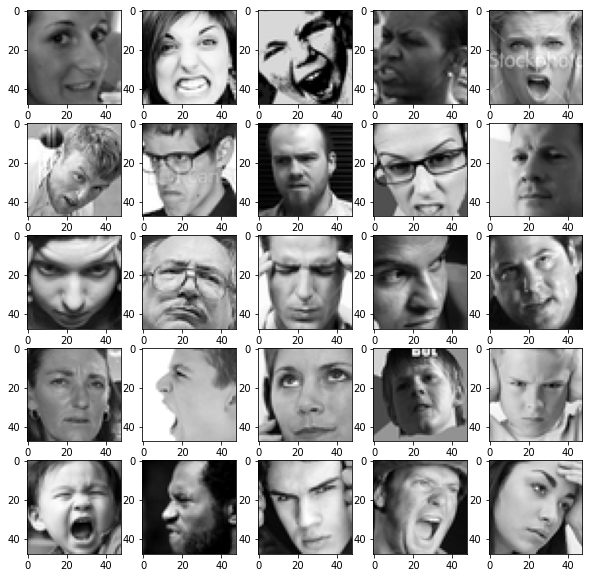

In [313]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))
plt.show()

In [314]:
#imports
import numpy as np
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

In [315]:
#reshape data to have a single channel
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

In [316]:
#determine the shape of the input images
in_shape = X_train.shape[1:]

In [317]:
#determine the number of classes
n_classes = len(np.unique(y_train))
print(in_shape, n_classes)

(48, 48, 1) 7


In [318]:
#normalize pixel values
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [328]:
from tensorflow.keras.layers import BatchNormalization
#define model
model = Sequential()
model.add(Conv2D(50, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(50, (3,3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(100, (3,3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
# model.add(Dropout(0.8))
# model.add(BatchNormalization())
model.add(Dense(n_classes, activation='softmax'))

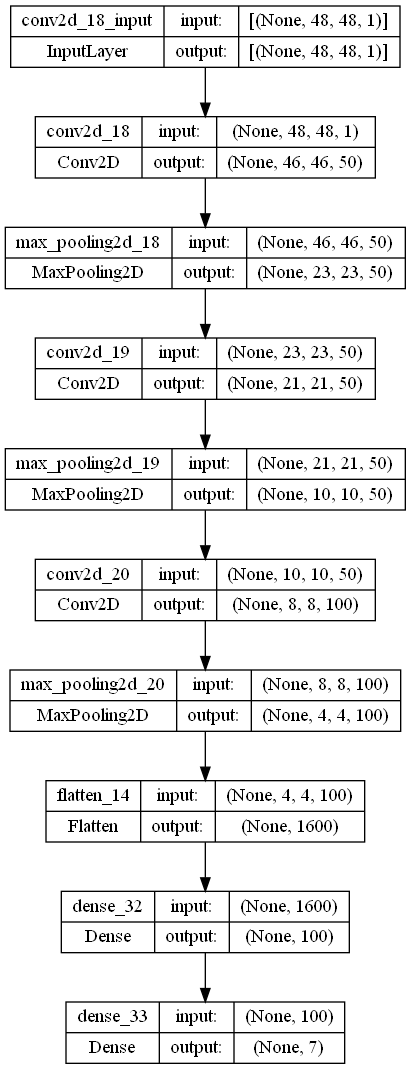

In [329]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [330]:
#define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [331]:
#fit the model
t0 = time.time()
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


t1 = time.time()

dt = t1-t0
print(dt)

Epoch 1/10
202/202 [==============================] - 46s 222ms/step - loss: 1.5360 - accuracy: 0.3766 - val_loss: 6.2076 - val_accuracy: 0.0266
Epoch 2/10
202/202 [==============================] - 44s 217ms/step - loss: 1.3329 - accuracy: 0.4849 - val_loss: 7.3908 - val_accuracy: 0.0184
Epoch 3/10
202/202 [==============================] - 44s 218ms/step - loss: 1.2354 - accuracy: 0.5215 - val_loss: 7.5591 - val_accuracy: 0.0022
Epoch 4/10
202/202 [==============================] - 44s 216ms/step - loss: 1.1586 - accuracy: 0.5541 - val_loss: 7.1255 - val_accuracy: 0.1109
Epoch 5/10
202/202 [==============================] - 44s 217ms/step - loss: 1.0994 - accuracy: 0.5796 - val_loss: 7.9762 - val_accuracy: 0.0452
Epoch 6/10
202/202 [==============================] - 44s 217ms/step - loss: 1.0403 - accuracy: 0.6054 - val_loss: 7.6290 - val_accuracy: 0.0921
Epoch 7/10
202/202 [==============================] - 44s 216ms/step - loss: 0.9841 - accuracy: 0.6301 - val_loss: 8.4001 - val_ac

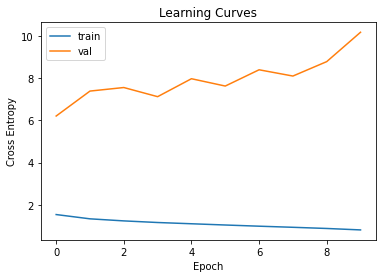

In [332]:
#plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [333]:
loss, acc = model.evaluate(X_test, y_test)
print('Accuracy: %.3f' % acc)

113/113 [==============================] - 2s 14ms/step - loss: 3.0190 - accuracy: 0.4684
Accuracy: 0.468


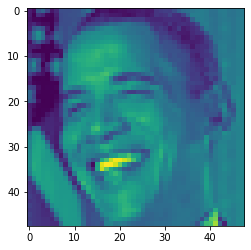

In [354]:
image = X_train[10001]
plt.imshow(image)

In [363]:
#make a prediction

yhat = model.predict(np.asarray([image]))
print('yhat= %s' % yhat)
print('Predicted: class=%d, %s, confidence= %.4s percent' % (np.argmax(yhat),emo[np.argmax(yhat)], yhat[0][np.argmax(yhat)]*100))

1/1 [==============================] - 0s 19ms/step
yhat= [[1.16172631e-03 3.72056320e-06 1.01575155e-04 9.98396337e-01
  2.84662441e-04 5.19864407e-05 2.31079023e-09]]
Predicted: class=3, happiness, confidence= 99.8 percent


In [356]:
emo[np.argmax(yhat)]

'happiness'